In [28]:
import pandas as pd
from flask import (
    Flask,
    render_template,
    jsonify,
    request,
    redirect)
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_2015= 'data/2015.csv'
df_2015 = pd.read_csv(file_2015)
file_2016= 'data/2016.csv'
df_2016 = pd.read_csv(file_2016)
file_2017= 'data/2017.csv'
df_2017 = pd.read_csv(file_2017)
file_2018= 'data/2018.csv'
df_2018 = pd.read_csv(file_2018)
file_2019= 'data/2019.csv'
df_2019 = pd.read_csv(file_2019)


In [6]:
df2015_cleaned=df_2015.drop(columns=['Standard Error', 'Family', 'Dystopia Residual', 'Region'])
#add year column 
df2015_cleaned['Year']='2015'
df2016_cleaned= df_2016.drop(columns=['Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Dystopia Residual'])
df2016_cleaned['Year']='2016'
df2017_cleaned=df_2017.drop(columns=['Whisker high','Whisker low', 'Family', 'Dystopia Residual'])
df2017_cleaned=df2017_cleaned.rename(columns={'Economy GDP per Capita': 'Economy (GDP per Capita)', 'Health Life Expectancy':'Health (Life Expectancy)','Trust Government Corruption.': 'Trust (Government Corruption)' })
df2017_cleaned['Year']='2017'
df2018_cleaned=df_2018.drop(columns=['Social support'])
df2018_cleaned.columns
df2018_cleaned=df2018_cleaned.rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)'})
df2018_cleaned['Year']='2018'
df2019_cleaned=df_2019.drop(columns=['Social support' ])
df2019_cleaned=df2019_cleaned.rename(columns={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)','Country or region':'Country'})
df2019_cleaned['Year']='2019'

In [7]:
#merging all dataframes
# merged=result = df1.append(df2)
happiness_df=df2015_cleaned.append([df2016_cleaned,df2017_cleaned, df2018_cleaned, df2019_cleaned])

In [8]:
happiness_df = happiness_df.rename(columns={'Happiness Rank':'Happiness_Rank',
                             'Happiness Score':'Happiness_Score',
                             'Economy (GDP per Capita)':'Economy',
                             'Health (Life Expectancy)':'Health', 
                             'Trust (Government Corruption)': 'Trust'})

In [9]:
happiness_df

,Country,Happiness_Rank,Happiness_Score,Economy,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,2019


In [51]:
# good_movies_df = movie_file_df.loc[movie_file_df["IMDB"] > 7, [
#     "FILM", "IMDB", "IMDB_user_vote_count"]]
years_2019= happiness_df.loc[happiness_df['Year']=='2019', ['Country','Happiness_Rank','Happiness_Score']]

In [52]:
years_2019=years_2019.head(10)
years_2019

,Country,Happiness_Rank,Happiness_Score
0,Finland,1,7.769
1,Denmark,2,7.600
2,Norway,3,7.554
3,Iceland,4,7.494
4,Netherlands,5,7.488
5,Switzerland,6,7.480
6,Sweden,7,7.343
7,New Zealand,8,7.307
8,Canada,9,7.278
9,Austria,10,7.246


In [53]:
x_axis_2019=years_2019['Country']

In [54]:
x_axis_2019.to_list()

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria']

In [55]:
y_axis_2019= years['Happiness_Score']

In [56]:
y_axis_2019.to_list()

[7.769,
 7.6,
 7.553999999999999,
 7.494,
 7.4879999999999995,
 7.48,
 7.343,
 7.307,
 7.278,
 7.246]

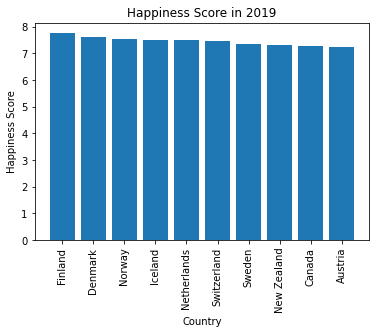

In [79]:
plt.bar(x_axis_2019, y_axis_2019, align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel('Happiness Score')
plt.title('Happiness Score in 2019')
plt.savefig('happines_score_2019.jpg')  


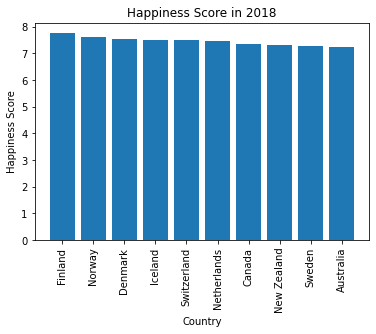

In [78]:
years_2018= happiness_df.loc[happiness_df['Year']=='2018', ['Country','Happiness_Rank','Happiness_Score']]
years_2018=years_2018.head(10)
x_axis_2018=years_2018['Country']
x_axis_2018.to_list()
y_axis_2018= years['Happiness_Score']
y_axis_2018.to_list()
plt.bar(x_axis_2018, y_axis_2018, align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel('Happiness Score')
plt.title('Happiness Score in 2018')
plt.savefig('happines_score_2018.jpg')  


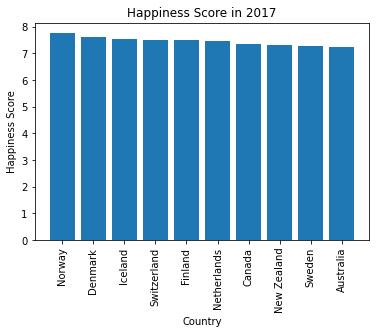

In [77]:
years_2017= happiness_df.loc[happiness_df['Year']=='2017', ['Country','Happiness_Rank','Happiness_Score']]
years_2017=years_2017.head(10)
x_axis_2017=years_2017['Country']
x_axis_2017.to_list()
y_axis_2017= years['Happiness_Score']
y_axis_2017.to_list()
plt.bar(x_axis_2017, y_axis_2017, align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel('Happiness Score')
plt.title('Happiness Score in 2017')
plt.savefig('happines_score_2017.jpg')  


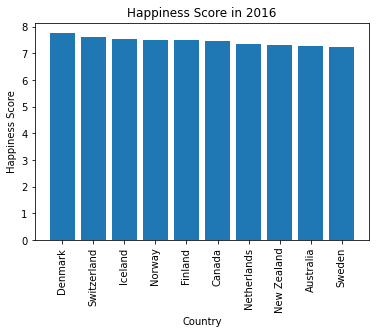

In [76]:
years_2016= happiness_df.loc[happiness_df['Year']=='2016', ['Country','Happiness_Rank','Happiness_Score']]
years_2016=years_2016.head(10)
x_axis_2016=years_2016['Country']
x_axis_2016.to_list()
y_axis_2016= years['Happiness_Score']
y_axis_2016.to_list()
plt.bar(x_axis_2016, y_axis_2016, align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel('Happiness Score')
plt.title('Happiness Score in 2016')
plt.savefig('happines_score_2016.jpg')  


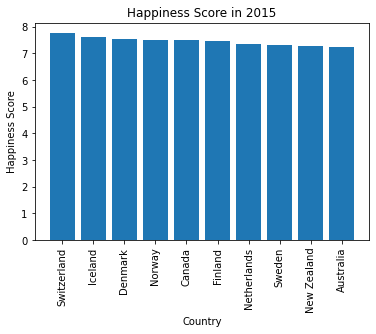

In [75]:
years_2015= happiness_df.loc[happiness_df['Year']=='2015', ['Country','Happiness_Rank','Happiness_Score']]
years_2015=years_2015.head(10)
x_axis_2015=years_2015['Country']
x_axis_2015.to_list()
y_axis_2015= years['Happiness_Score']
y_axis_2015.to_list()
plt.bar(x_axis_2015, y_axis_2015, align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel('Happiness Score')
plt.title('Happiness Score in 2015')
plt.savefig('happines_score_2015.jpg')  
